In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## Składnia i API

Seaborn orginalnie obsługuje składnię funkcyjną, podobną do gplot() lub R graphics. Obecnie trwają pracę nad składnią obiektową AKA `Grammar of Graphics`, ale składnia ta jest dziwna i nie jest powiedziane że w takiej postaci ostatecznie pozostanie. Składnia obiektowa nie jest do końca kompatybilna z matplotlib. Poznanie paradygmatu pracy biblioteki seaborn jest kluczowe, gdyż różne biblioteki realizują zadania w różny sposób.

Trzy główne typy wykresów:

- relplot - relacja między zmiennymi
- catplot - wykresy zawierające zmienne kateogryzacyjne
- displot - rozkłady statystyczne zmiennych 

...oraz kilkanaście wykresów specjalistycznych, w tym:

- regplot - regresja
- clustermap - mapy skupień
- pairplot - wykresy wielozmienne 
- joinplot - marginal plots, wykresy łączęce zależności z rozkładami

Wszystkie powyższe operują na tzw. figure-level, ich specyficzne odmiany pracują na poziomie axes (axes-level).
- Axes-level:  mn. regplot, boxplot, kdeplot (niższy poziom)

Składnia seaborn jest typowo proceduralna, ale uwzględnia gramatykę grafiki

```python
seaborn.xxplot(data=None, *, x=N
               one, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)

```


## Podstawowe zbiory danych

Podstawowe zbiory danych są przygotowane do wyświetlania w seaborn. Dane pozyskiwane z innych źródeł muszą być agregowane i przekształcane. Seaborn obsługuje dane w tzw. "postaci wąskiej". Ładowanie danych to nkładka na `pd.read_csv()`

In [2]:
datasets = sns.get_dataset_names()
print(datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
tips = sns.load_dataset("tips") # dane kategoryzowane i numeryczne
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Seaborn posiada dwa tryby diagramów: diagram poziomu figury i wykres poziomu wykresu (ax). Poziom figury zwraca figurę poziom wykresu przeznaczony jest do samodzielnego łączenia na poziomie matplotlib.
Oba tryby współdzielną składnię.

**Poziom figury (figure level)** Tworzy złożony obiekt, składający się z kilku axes, tu przykład z mapowaniem kilku kolumn na różne zmienne wizualne

**Poziom wykresu (axes level)** - wywoływane są funcje, które zwracają grafikę na poziomie axes a nie figure.

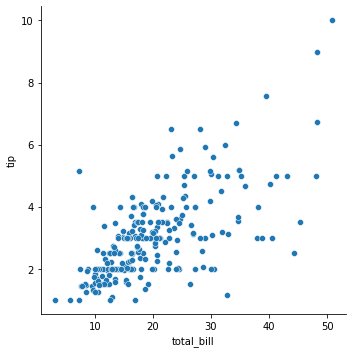

In [4]:
fig = sns.relplot(tips,x="total_bill",y="tip",kind="scatter")

In [5]:
# analiza co jest w środku
type(fig)


seaborn.axisgrid.FacetGrid

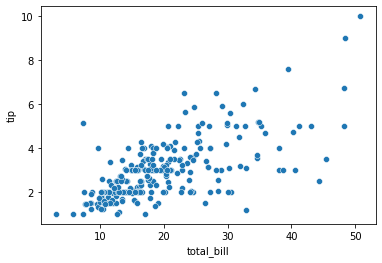

In [6]:
ax = sns.scatterplot(tips,x="total_bill",y="tip")

In [7]:
# analiza tego co jest w axes
type(ax)


matplotlib.axes._subplots.AxesSubplot

Do samodzielnego wykonania:

Formatowanie obu typów wykresów:

https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

Wczytanie własnych danych do formatu pandas i wykonanie wykresu: użyjemy danych o pokemonach lub innych danych:

https://archive-beta.ics.uci.edu/datasets

In [8]:
pokemony = pd.read_csv("dane/Pokemon.csv")
pokemony

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


## Wykresy prezentujące zmienne:

* **ciągłe** - prezentujące rozkłady zmiennych (distribution) i zależności między zmiennymi (relation)
* **dyskretne** - prezentujące rozkłady zmiennych w obrębie kategorii

Trzy odmiany wykresu ciągłego dla tych samych danych:

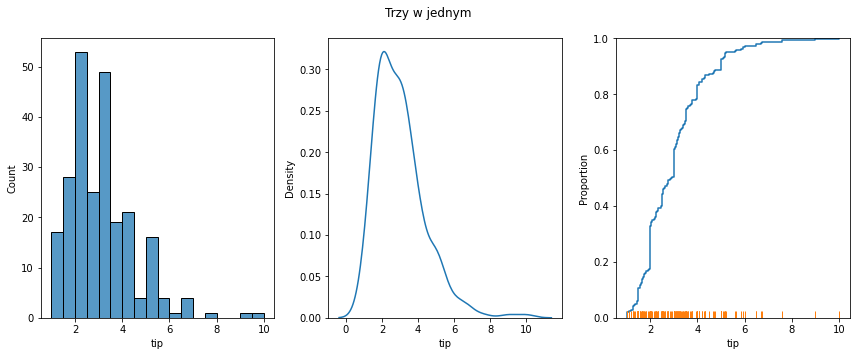

In [9]:
fig, axes = plt.subplots(ncols=3,figsize=(12,5))
sns.histplot(tips.tip,ax=axes[0]) # nie trzeba całego zbioru danych
sns.kdeplot(tips,x="tip",ax=axes[1]) # tu zbiór danych i x
sns.ecdfplot(tips.tip,ax=axes[2])
sns.rugplot(tips.tip,ax=axes[2]) # dwa wykresy na jednym axes
fig.suptitle("Trzy w jednym")
fig.tight_layout() # a to matplotlib



Pytania:

* czemu stosujemy różne składnie?
* skąd się wzięły trzy wykresy?
* dlaczego część jest niebieska, część czarna a część pomarańczowa?
* po co funkcja tight_layout?

Dla odmiany wykres na poziomie figury. 

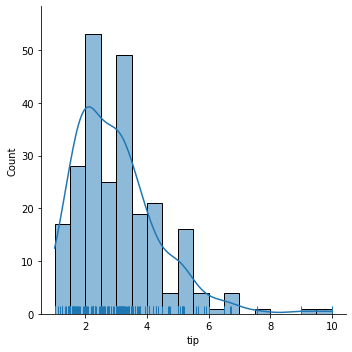

In [10]:
sns.displot(tips,x="tip",kde=True,rug=True) # zobaczyć dokumentację

Pytania:

* czym się różni kde od eug
* jak formatować takie wykresy?
* czym są `**kwargs`

Wykresy dla zmiennych 

Dane są grupowane na podstawie klasy. Wyliczana jest dla nich statystyka, odchylenie standardowe. Metody prezentacji:

* rozporoszone
* rozkładów
* estymacji

https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

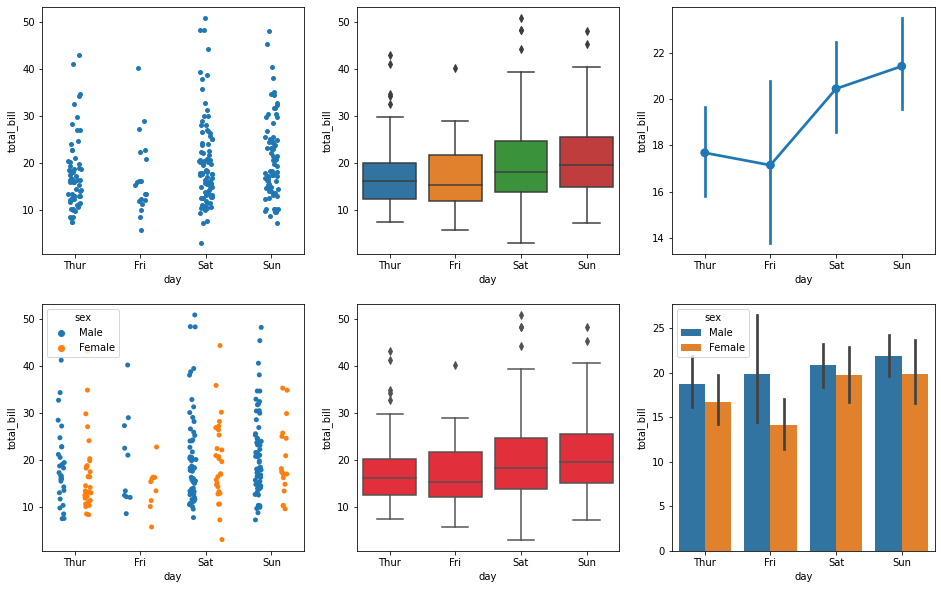

In [11]:
fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(16,10))
sns.stripplot(tips,x="day",y="total_bill",ax=axes[0][0])
sns.boxplot(tips,x="day",y="total_bill",ax=axes[0][1]) 
sns.pointplot(tips,x="day",y="total_bill",ax=axes[0][2])

sns.stripplot(tips,x="day",y="total_bill",ax=axes[1][0],hue="sex",dodge=True)
sns.boxplot(tips,x="day",y="total_bill",ax=axes[1][1],color="#FF1122") 
sns.barplot(tips,x="day",y="total_bill",hue="sex",ax=axes[1][2])


Wykres kategoryzacyjny i nakładanie wykresów

<AxesSubplot:xlabel='day', ylabel='tip'>

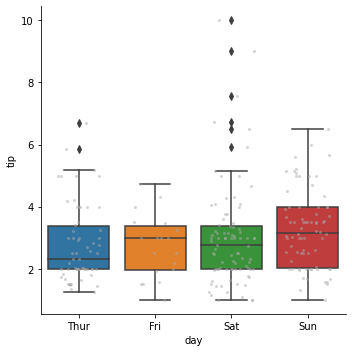

In [12]:
sns.catplot(data=tips, x="day", y="tip", kind="box")
sns.stripplot(data=tips, x="day", y="tip", size=3,color="#AAAAAA",alpha=0.5,jitter=0.3)

Pytania:

* co to jest hue?
* co to jest dodge?
* skąd kolory w boxplot?
* dlaczego stripplot jest rozproszony?
* dlaczego wykresy się nakładają, co to jest gca?

Zadanie samodzielne: skonstruować opowieść o kategoriach pokemonów używając danych.

## Gotowe szablony i funkcje map

Niektóre diagramy poziomu figury Składają się z kilku wykresów tworzonych na podstawie szablonu (tylko figure level):

* facetplot
* pairplot
* jointplot

Każdy z tych wykresów można otrzymać bezpośrednio, używając wybranych funkcji lub parametrów, lub tworząc siatkę a następnie mapując wybrany typ wykresu na siatkę. 

> Mechanizm mapowania wykresów jest bradzo rozbudowany i szczegóły należy zgłębić samodzielnie

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid

https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid

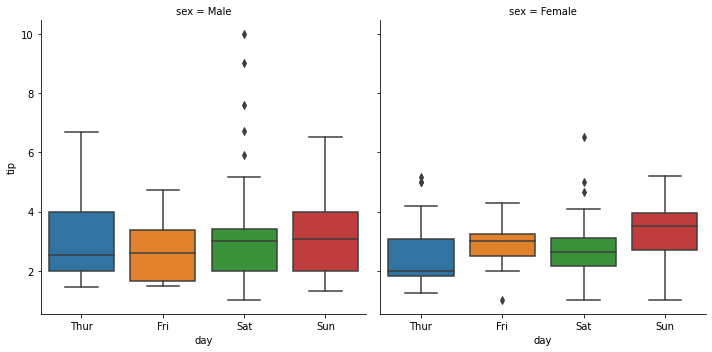

In [13]:
sns.catplot(data=tips, x="day", y="tip", col="sex", kind="box")

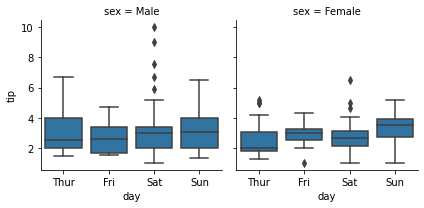

In [14]:
g = sns.FacetGrid(tips,col="sex")
#g.map(sns.boxplot,"day","tip") # bez nazw parametrów
g.map_dataframe(sns.boxplot,x="day",y="tip") # bez nazw parametrów

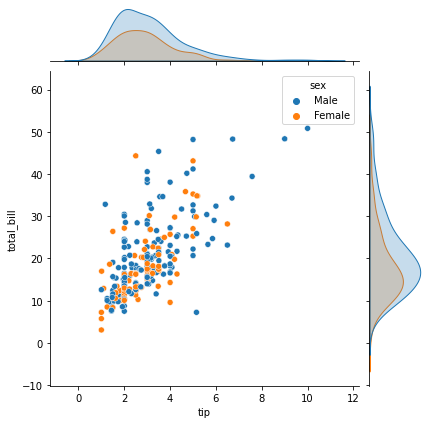

In [15]:
sns.jointplot(tips,x="tip",y="total_bill",hue="sex") # różnice gdy hue występuje

In [16]:
concrete = pd.read_csv("dane/concrete.csv")
concrete

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


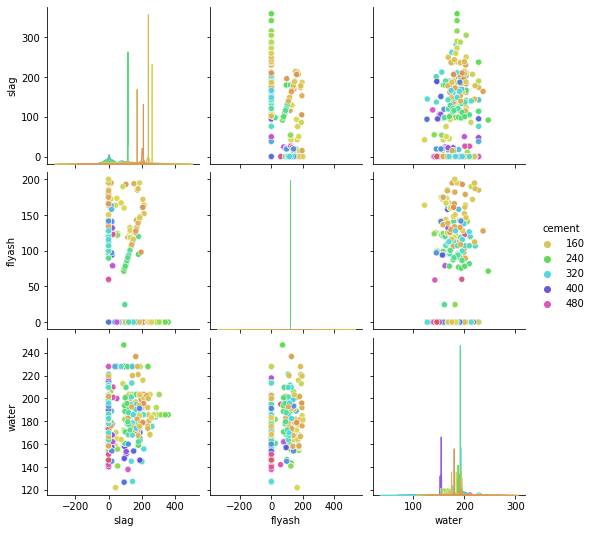

In [20]:
sns.pairplot(concrete.iloc[:,:4],hue="cement",palette="hls")

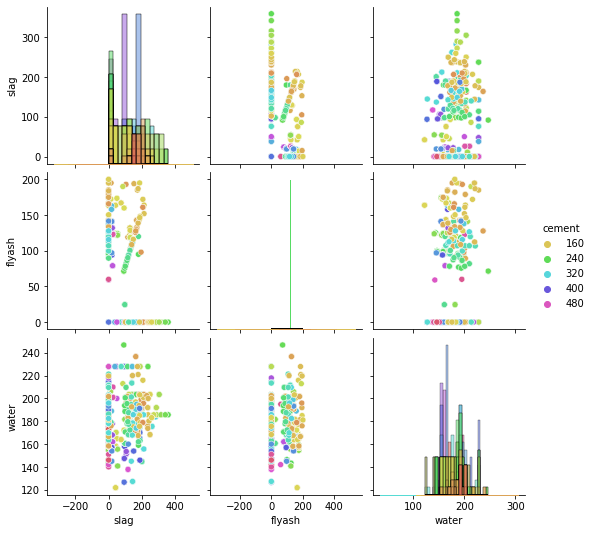

In [25]:
g = sns.pairplot(concrete.iloc[:,:4],hue="cement",palette="hls")
g.map_diag(sns.histplot)

## Zarządzanie kolorami, style i konteksty

W seaborn odrózniamy styl (estetyki) i kontekst (formatowanie). Można też definiować własne palety kolorów.

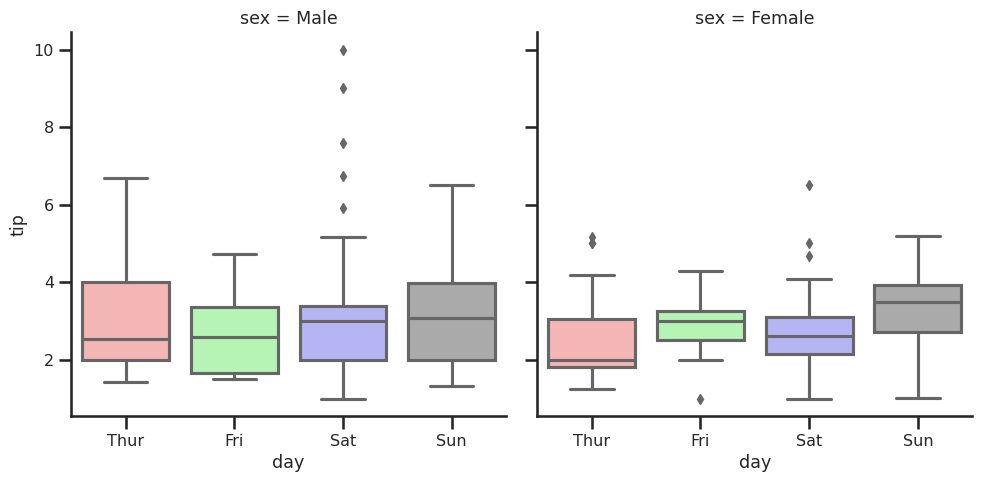

In [42]:
sns.set_style("ticks", {"grid.color": ".2", "grid.linestyle": "--"})
sns.set_context("talk",font_scale=0.7) # jedyny parameter
pal = sns.color_palette(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])
#sns.set_palette("Set2")
sns.set_palette(pal)
sns.catplot(data=tips, x="day", y="tip", col="sex", kind="box")
sns.reset_defaults()

Pytania:

* czym są elementy w {}?
* czym się różnią palety wbudowane od własnych?